In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
get_attr = lambda x: lambda y: x.y
df = pd.read_csv('temperature_data_processed.csv')
df = df.astype({'stationid': np.int32, 'temp': np.float64, 'time': np.int32})
df['date']  = pd.to_datetime(df['date'], format="%Y%m%d")
df['year']  = df['date'].map(lambda x: x.year)
df['month'] = df['date'].map(lambda x: x.month)
df['day']   = df['date'].map(lambda x: x.day)
df = df[df['temp'] != -999.0]
df

,stationid,temp,date,time,year,month,day
0,3,-5.6,1891-01-01,7,1891,1,1
1,3,-0.7,1891-01-01,14,1891,1,1
2,3,-4.0,1891-01-01,21,1891,1,1
3,3,-5.2,1891-01-02,7,1891,1,2
4,3,-1.0,1891-01-02,14,1891,1,2
...,...,...,...,...,...,...,...
6972476,15526,7.4,1935-12-30,14,1935,12,30
6972477,15526,7.0,1935-12-30,20,1935,12,30
6972478,15526,7.0,1935-12-31,8,1935,12,31
6972479,15526,8.2,1935-12-31,14,1935,12,31


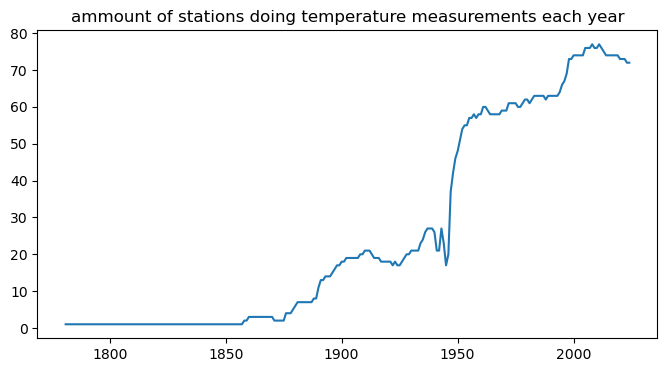

In [4]:
meas_per_year = df[['year','stationid']].groupby('year').nunique().reset_index()
fig, ax = plt.subplots(figsize=(8,4))
_ = ax.plot(meas_per_year['year'], meas_per_year['stationid'])
_ = ax.set_title('ammount of stations doing temperature measurements each year')

In [5]:
stations_1960 = set(df.loc[df['year'] == 1960])
stations_2020 = set(df.loc[df['year'] == 2020])
refrence_stations = df[list(stations_1960 & stations_2020)]
refrence_range = refrence_stations.loc[refrence_stations['year'].isin(range(1960, 2021))]
refrence = refrence_range.loc[refrence_range['time'].isin([12, 14])]
refrence

,month,time,stationid,year,date,temp,day
59167,1,14,3,1960,1960-01-01,9.9,1
59170,1,14,3,1960,1960-01-02,8.2,2
59173,1,14,3,1960,1960-01-03,6.8,3
59176,1,14,3,1960,1960-01-04,9.6,4
59179,1,14,3,1960,1960-01-05,9.6,5
...,...,...,...,...,...,...,...
6919631,12,12,15000,2020,2020-12-27,3.8,27
6919634,12,12,15000,2020,2020-12-28,3.2,28
6919637,12,12,15000,2020,2020-12-29,3.6,29
6919640,12,12,15000,2020,2020-12-30,2.9,30


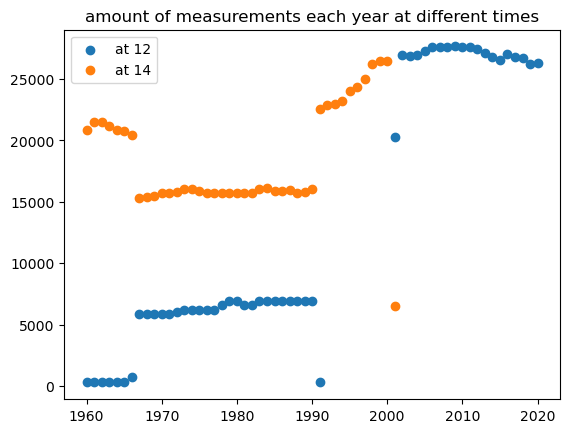

In [6]:
at12 = refrence[refrence['time'] == 12].groupby('year').size().reset_index().rename(columns={0: 'count'})
at14 = refrence[refrence['time'] == 14].groupby('year').size().reset_index().rename(columns={0: 'count'})
fig, ax = plt.subplots()
ax.scatter(at12['year'], at12['count'], label='at 12')
ax.scatter(at14['year'], at14['count'], label='at 14')
ax.set_title('amount of measurements each year at different times')
_ = ax.legend()

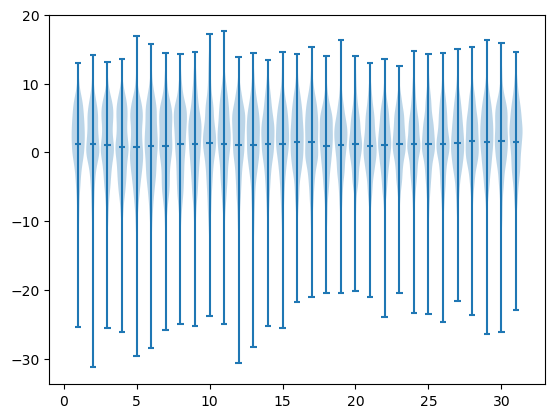

In [49]:
def create_overview_for_month(i: int):
    assert i in range(1,13), "not a valid month"
    m = refrence[refrence['month'] == i]
    arr = [[] for _ in range(1, 32)]
    for d, data in m.groupby('day'):
        arr[d-1] = np.array(data['temp'])
    stds = []
    for d in arr:
        stds.append(np.std(d))
    return stds, arr
stds, ys = create_overview_for_month(1)
_ = plt.violinplot(ys, showmeans=True, widths=0.9)

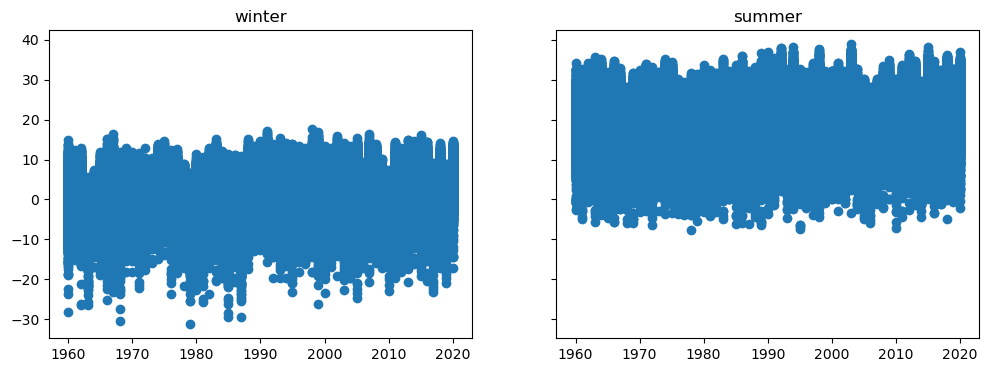

In [8]:
jan = refrence[refrence['month'] == 1]
aug = refrence[refrence['month'] == 8]
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True)
ax[0].scatter(jan['year'], jan['temp'])
ax[0].set_title('winter')
ax[1].scatter(aug['year'], aug['temp'])
_ = ax[1].set_title('summer')